#Text Analytics | Assignment 4

**Submitted by:**

Panagiotis Antoniozas
Spyros Mastrodimitris Gounaropoulos 
Panagiota Tavoularea 

##Downloading, Importing & Understanding our Data Set

In [ ]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

from sklearn.datasets import load_files  

#download the files
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
 
#save the reviews and the annotations to x, y respectively 
x, y = movies.data, movies.target

--2023-03-10 07:30:37--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  2.29MB/s    in 1.3s    

2023-03-10 07:30:39 (2.29 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv0

>Finding the Boolean Number for each Category

In [ ]:
#print the target names and the number of reviews
print("(y=0) corresptonds to -->",movies.target_names[0])
print("(y=1) corresptonds to-->",movies.target_names[1])

(y=0) corresptonds to --> neg
(y=1) corresptonds to--> pos


>Printing a Review

In [ ]:
# First sample and target
print('Sample: {} \nTarget: {}'.format(x[0], y[0]))

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 




##  Preprocess Dataset

>Preprocess the Dataset

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
docs = []

for doc in x: 
    
    # Remove non-word (special) characters such as punctuation. etc
    document = re.sub(r'\W', ' ', str(doc))

    # Remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  
    #Remove all digits
    document = re.sub(" \d+", " ", document)

    # Substitute multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Convert to Lowercase
    document = document.lower()

    # Split the document based on whitespaces (--> List of words)
    document = document.split()
    
    # Lemmatization
    document = [stemmer.lemmatize(word) for word in document]
    
    # Reconstruct the document by joining the words on each whitespace
    document = ' '.join(document)

    # Append all documents into a list 'docs'
    docs.append(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


>Print a Review, Before and After Data Preprocessing

In [ ]:
from pprint import pprint

print("\nOriginal review text:\n")
pprint(format(x[0]))
print("\nFiltered review text:\n")
pprint(format(docs[0]))
print("\nLabel:\n", y[0])


Original review text:

('arnold schwarzenegger has been an icon for action enthusiasts , since the '
 "late 80's , but lately his films have been very sloppy and the one-liners "
 'are getting worse . \n'
 "it's hard seeing arnold as mr . freeze in batman and robin , especially when "
 "he says tons of ice jokes , but hey he got 15 million , what's it matter to "
 'him ? \n'
 'once again arnold has signed to do another expensive blockbuster , that '
 "can't compare with the likes of the terminator series , true lies and even "
 'eraser . \n'
 'in this so called dark thriller , the devil ( gabriel byrne ) has come upon '
 'earth , to impregnate a woman ( robin tunney ) which happens every 1000 '
 'years , and basically destroy the world , but apparently god has chosen one '
 'man , and that one man is jericho cane ( arnold himself ) . \n'
 'with the help of a trusty sidekick ( kevin pollack ) , they will stop at '
 'nothing to let the devil take over the world ! \n'
 'parts of this are

>Calculation of the Average Number of Words per Review

In [ ]:
#a for loop that creates a list named words that contains the number of words for each review 
words=[]
for doc in docs:
  words_list = doc.split()
  words.append(len(words_list))

#print a sample
print("A sample:",words[1:5])

A sample: [527, 304, 337, 117]


In [ ]:
#a for loop that helps us to calculate the following:

#Number of Positive Reviews
#Number of Negative Reviews
#Average Number of Words per Review
#Average Number of Words per Positive Review
#Average Number of Words per Negative Review
#The Number of Total Reviews

tot=0
s=0
s1=0
s2=0
pos=0
neg=0

for i in range(len(docs)):
  tot+=words[i]
  s+=1
  if y[i]==0:
    neg+=words[i]
    s1+=1
  else:
    pos+=words[i]
    s2+=1

#print the results
print("Number of Positive Reviews:",s1)
print("Number of Negative Reviews:",s2)
print("")
print("Average Number of Words per Review:",round(tot/s))
print("Average Number of Words per Positive Review:",round(pos/s2))
print("Average Number of Words per Negative Review:",round(neg/s1))
print("")
print("The Number of Total Reviews:",len(x))

Number of Positive Reviews: 1000
Number of Negative Reviews: 1000

Average Number of Words per Review: 629
Average Number of Words per Positive Review: 665
Average Number of Words per Negative Review: 593

The Number of Total Reviews: 2000


>Calculation of the Average Number of Characters per Review

In [ ]:
#a for loop that helps us to calculate the following:

#Number of Positive Reviews
#Number of Negative Reviews
#Average Number of Characters per Review
#Average Number of Characters per Positive Review
#Average Number of Characters per Negative Review
#The Number of Total Reviews

s=0
s1=0
s2=0
pos=0
neg=0
for i in range(len(x)):
  s+=len(x[i])
  if y[i]==0:
    pos+=1
    s1+=len(x[i])
  if y[i]==1:
    neg+=1
    s2+=len(x[i])

print("Number of Positive Reviews:",pos)
print("Number of Negative Reviews:",neg)
print("")
print("Average Number of Characters per Review:",round(s/len(x)))
print("Average Number of Characters per Positive Review:",round(s1/pos))
print("Average Number of Characters per Negative Review:",round(s2/neg))
print("")
print("The Number of Total Reviews:",len(x))

Number of Positive Reviews: 1000
Number of Negative Reviews: 1000

Average Number of Characters per Review: 3893
Average Number of Characters per Positive Review: 3662
Average Number of Characters per Negative Review: 4124

The Number of Total Reviews: 2000


##Split The Data to Train, Test and Dev

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# split the sentences to train, test, dev
xtrain,xtest,ytrain,ytest=train_test_split(docs,y, train_size=0.7,random_state=40)
xtrain,xdev,ytrain,ydev=train_test_split(xtrain,ytrain, train_size=0.7,random_state=40)

#show the reviews per data set
print("Number of Reviews in Train Set:",len(xtrain))
print("Number of Reviews in Test Set:",len(xtest))
print("Number of Reviews in Dev Set:",len(xdev))

Number of Reviews in Train Set: 979
Number of Reviews in Test Set: 600
Number of Reviews in Dev Set: 421


>Visualization of the Reviews Frequencies per Class Per Data Set

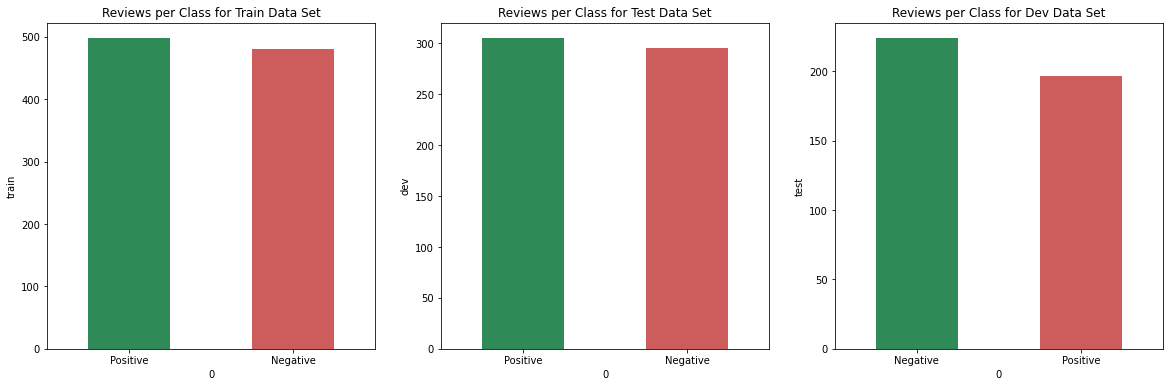

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#convert data to dataframes
ytrain_for_plot = pd.DataFrame (ytrain)
ytest_for_plot = pd.DataFrame (ytest)
ydev_for_plot = pd.DataFrame (ydev)

#change dimentions  of the plot
fig, axs = plt.subplots(1, 3,figsize=(20,6))

#create the bar plots
tr = ytrain_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="train", ax=axs[0])
te = ytest_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="dev", ax=axs[1])
de = ydev_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="test", ax=axs[2])

#set the titles
tr.set_title("Reviews per Class for Train Data Set")
te.set_title("Reviews per Class for Test Data Set")
de.set_title("Reviews per Class for Dev Data Set")

#set the "x" labels
tr.set_xticklabels(['Positive', 'Negative'],rotation=0)
te.set_xticklabels(['Positive', 'Negative'],rotation=0)
de.set_xticklabels(['Negative', 'Positive'],rotation=0)

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

fig.show()

## TF-IDF n-gram Features Creation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), # unigrams and bigrams
    max_features = 5000, # we keep only the words that have TF<=threshold,
    sublinear_tf = True, # instead of TF/IDF --> (1+ log(TF))/IDF, 
    stop_words = stopwords.words('english')) # ignore english stopwords (the, is, and)

# Fit Vectorizer on train data
# Transform on all data (train - test - dev)
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xtest_tfidf = vectorizer.transform(xtest)
xdev_tfidf = vectorizer.transform(xdev)

#print for each data set it's reviews and features
print("")
print("Each data set reviews and features:")
print("")
print('Shape of Training Data: {}'.format(xtrain_tfidf.shape))
print('Shape of Test Data: {}'.format(xtest_tfidf.shape))
print('Shape of Dev Data: {}\n'.format(xdev_tfidf.shape))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Each data set reviews and features:

Shape of Training Data: (979, 5000)
Shape of Test Data: (600, 5000)
Shape of Dev Data: (421, 5000)



## Feature Selection

>Now we will use the SVD Method to reduce our features 

In [ ]:
# Reduce dimensionality using svd 5000 --> 1000
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, random_state=40)
xtrain_tfidf_svd1 = svd.fit_transform(xtrain_tfidf)
xdev_tfidf_svd1 = svd.transform(xdev_tfidf)
xtest_tfidf_svd1 = svd.transform(xtest_tfidf)

##Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import pandas as pd
import time
import numpy as np

# Train
baseline = DummyClassifier(strategy='most_frequent',random_state=40)
start_time = time.time()
baseline.fit(xtrain_tfidf_svd1, ytrain)

#print the time passed
print("Training took: {} seconds \n".format(time.time() - start_time))

Training took: 0.0013957023620605469 seconds 



>Confusion Matrix for Train Set

Train f1-score: 67.43%
Confusion Matrix for train data:


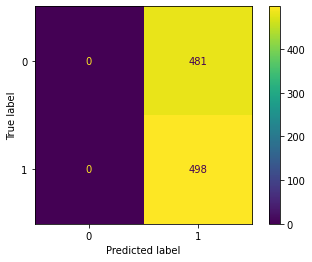

In [ ]:
predictions = baseline.predict(xtrain_tfidf_svd1)
score = f1_score(ytrain,predictions)

#print f1 score
print("Train f1-score: {:.2f}%".format(score*100))

#print the confusion matrix
print("Confusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtrain_tfidf_svd1, ytrain, values_format = '.0f')

>Confusion Matrix for Test Set

Test f1-score: 67.40% 

Confusion Matrix for test data:


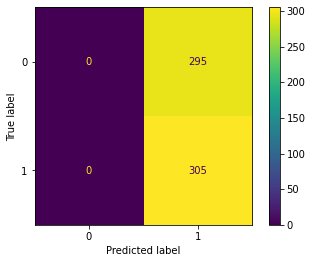

In [ ]:
predictions_test = baseline.predict(xtest_tfidf_svd1)
score = f1_score(ytest, predictions_test)

#print f1 score
print("Test f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtest_tfidf_svd1, ytest, values_format = '.0f')

>Confusion Matrix for Dev Set

Dev f1-score: 63.75% 

Confusion Matrix for dev data:


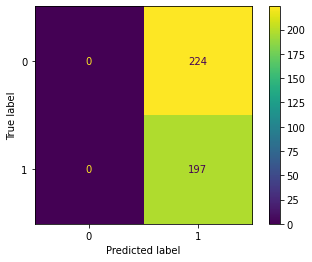

In [ ]:
predictions_dev = baseline.predict(xdev_tfidf_svd1)
score = f1_score(ydev,predictions_dev)

#print f1 score
print("Dev f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(baseline, xdev_tfidf_svd1, ydev, values_format = '.0f')

>Classification Reports for all the Data Sets

In [ ]:
from sklearn import metrics

# print the classifiation reports
print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.51      1.00      0.67       498

    accuracy                           0.51       979
   macro avg       0.25      0.50      0.34       979
weighted avg       0.26      0.51      0.34       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.51      1.00      0.67       305

    accuracy                           0.51       600
   macro avg       0.25      0.50      0.34       600
weighted avg       0.26      0.51      0.34       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.00      0.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#for train set
pred_train = baseline.predict_proba(xtrain_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = baseline.predict_proba(xtest_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2
print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = baseline.predict_proba(xdev_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2
print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)

(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.7456588355464759
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.7543411644535241
(Train Set): Average Presision-Recall AUC Score is: 0.75

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.7458333333333333
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.7541666666666667
(Test Set): Average Presision-Recall AUC Score is: 0.75

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.7660332541567696
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.7339667458432304
(Dev Set): Average Presision-Recall AUC Score is: 0.75


##Logistic Regression

>Logistic Regression Model Implemetation

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train
clf = LogisticRegression(solver='lbfgs',C=1,max_iter=10,l1_ratio=0.1,random_state=40)
start_time = time.time()
clf.fit(xtrain_tfidf_svd1, ytrain)

#print the time passed
print("Training took: {} seconds \n".format(time.time() - start_time))

Training took: 0.05313825607299805 seconds 



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>Confusion Matrix for Train Set

Train f1-score: 98.21%

Confusion Matrix for train data:


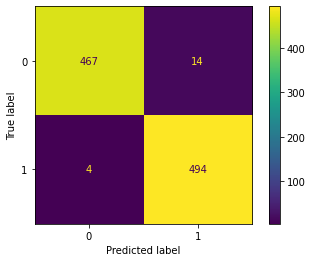

In [ ]:
# Evaluate
predictions = clf.predict(xtrain_tfidf_svd1)
score = f1_score(ytrain,predictions)

#print f1 score
print("Train f1-score: {:.2f}%".format(score*100))

#print the confusion matrix
print("\nConfusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(clf, xtrain_tfidf_svd1, ytrain, values_format = '.0f')

>Confusion Matrix for Test Set

Test f1-score: 85.26% 

Confusion Matrix for test data:


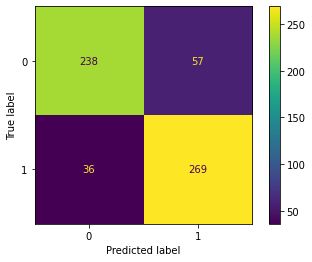

In [ ]:
predictions_test = clf.predict(xtest_tfidf_svd1)
score = f1_score(ytest, predictions_test)

#print f1 score
print("Test f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(clf, xtest_tfidf_svd1, ytest, values_format = '.0f')

>Confusion Matrix for Dev Set

Dev f1-score: 83.95% 

Confusion Matrix for dev data:


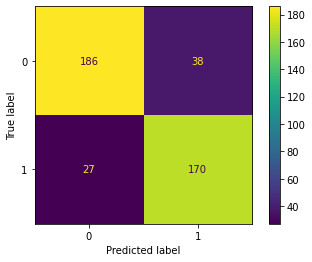

In [ ]:
predictions_dev = clf.predict(xdev_tfidf_svd1)
score = f1_score(ydev,predictions_dev)

#print f1 score
print("Dev f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(clf, xdev_tfidf_svd1, ydev, values_format = '.0f')

>Classification Report per Data Set

In [ ]:
# print the classifiation reports
print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       481
           1       0.97      0.99      0.98       498

    accuracy                           0.98       979
   macro avg       0.98      0.98      0.98       979
weighted avg       0.98      0.98      0.98       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       295
           1       0.83      0.88      0.85       305

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.87      0.

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


#for train set
pred_train = clf.predict_proba(xtrain_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = clf.predict_proba(xtest_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2

print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = clf.predict_proba(xdev_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2

print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)


(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.9983315437368695
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.9986340238813858
(Train Set): Average Presision-Recall AUC Score is: 0.9984827838091277

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.9256098728103688
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.9359910283125623
(Test Set): Average Presision-Recall AUC Score is: 0.9308004505614655

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.9381682228765827
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.9221404358339274
(Dev Set): Average Presision-Recall AUC Score is: 0.930154329355255


##MLP

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00


>Reduction of the Features to 150

In [ ]:
# Reduce dimensionality using svd 5000 --> 150
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=150, random_state=40)
xtrain_tfidf_svd1 = svd.fit_transform(xtrain_tfidf)
xdev_tfidf_svd1 = svd.transform(xdev_tfidf)
xtest_tfidf_svd1 = svd.transform(xtest_tfidf)

In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


def model_builder(hp):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=hp.Int('input layer perceptrons', min_value=32, max_value=512, step=32), input_dim=xtrain_tfidf_svd1.shape[1],activation=hp.Choice("input layer activation function", ['relu', 'sigmoid',"tanh","softmax"])))
  for i in range(hp.Int('layers', 1, 3, 1)):                                                   
    model.add(tf.keras.layers.Dense(hp.Choice('layer' + str(i) + "perceptrons", [32,256,512]),activation=hp.Choice('activation function' + str(i), ['relu', 'sigmoid',"tanh","softmax"])))
    if hp.Boolean("dropout"+str(i)):
       model.add(tf.keras.layers.Dropout(hp.Choice('dropout value'+str(i), [0.2, 0.5]))) #0.8
  
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-4]) #1e-2

  model.compile(loss="binary_crossentropy", #multiclass classification problem
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics=['accuracy'])
  return model

<ipython-input-27-9f68d0a60a3c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperParameters


In [ ]:
import keras_tuner as kt

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=100,
                        directory='my_dir',
                        project_name='intro_to_kt',seed = 40, overwrite = True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
tuner.search(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,callbacks=[early_stopping])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 100 Complete [00h 00m 05s]
val_accuracy: 0.4761904776096344

Best val_accuracy So Far: 0.8367347121238708
Total elapsed time: 00h 07m 57s


In [ ]:
tuner.results_summary(1)

Results summary
Results in my_dir/intro_to_kt
Showing 1 best trials
Trial summary
Hyperparameters:
input layer perceptrons: 224
input layer activation function: relu
layers: 2
layer0perceptrons: 256
activation function0: relu
dropout0: True
learning_rate: 0.0001
layer1perceptrons: 256
activation function1: tanh
dropout1: False
dropout value0: 0.2
dropout value1: 0.5
layer2perceptrons: 32
activation function2: softmax
dropout2: False
dropout value2: 0.5
Score: 0.8367347121238708


>Building the Optimal Model

Batch size 12

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=12,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
57/58 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5205
Epoch 1: val_accuracy improved from -inf to 0.61565, saving model to bestweights.hdf5
58/58 [==============================] - 1s 9ms/step - loss: 0.6906 - accuracy: 0.5212 - val_loss: 0.6884 - val_accuracy: 0.6156
Epoch 2/100
50/58 [========================>.....] - ETA: 0s - loss: 0.6832 - accuracy: 0.7033
Epoch 2: val_accuracy improved from 0.61565 to 0.72109, saving model to bestweights.hdf5
58/58 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.7080 - val_loss: 0.6816 - val_accuracy: 0.7211
Epoch 3/100
50/58 [========================>.....] - ETA: 0s - loss: 0.6699 - accuracy: 0.7583
Epoch 3: val_accuracy improved from 0.72109 to 0.73469, saving model to bestweights.hdf5
58/58 [==============================] - 0s 6ms/step - loss: 0.6687 - accuracy: 0.7577 - val_loss: 0.6687 - val_accuracy: 0.7347
Epoch 4/100
50/58 [========================>.....] - ETA: 0s - l

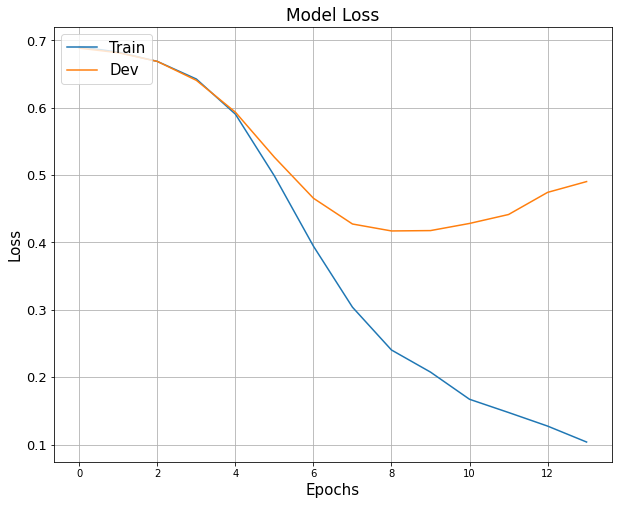

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

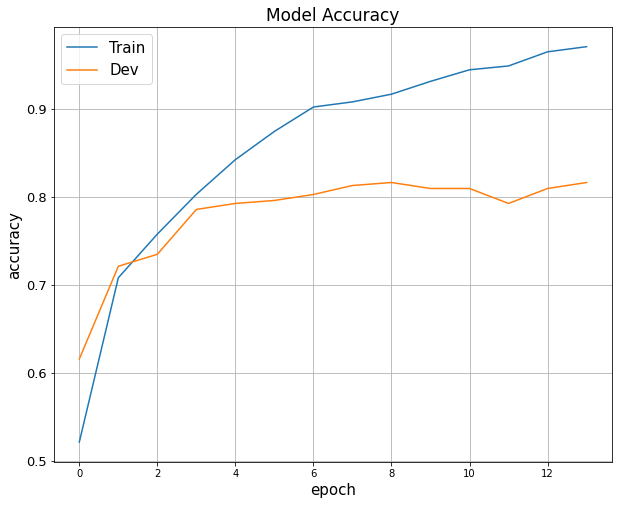

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       481
           1       0.94      0.92      0.93       498

    accuracy                           0.93       979
   macro avg       0.93      0.93      0.93       979
weighted avg       0.93      0.93      0.93       979



   Classification Report for *Test* Set

In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       295
           1       0.85      0.87      0.86       305

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600



Classification Report for Dev Set

In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       224
           1       0.83      0.84      0.83       197

    accuracy                           0.84       421
   macro avg       0.84      0.84      0.84       421
weighted avg       0.84      0.84      0.84       421



In [ ]:
probs_belong_to_class_1 = model.predict(xtrain_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

31/31 [==============================] - 0s 2ms/step

Precision Recall AUC score for the negative class:
0.9717231061961302

Precision Recall AUC score for the positive class:
0.9722986291677371

Macro-averaged Precision Recall AUC score:
0.9720108676819337


In [ ]:
probs_belong_to_class_1 = model.predict(xtest_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

19/19 [==============================] - 0s 2ms/step

Precision Recall AUC score for the negative class:
0.9084261029782137

Precision Recall AUC score for the positive class:
0.9296384820333838

Macro-averaged Precision Recall AUC score:
0.9190322925057988


In [ ]:
probs_belong_to_class_1 = model.predict(xdev_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)


print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

14/14 [==============================] - 0s 2ms/step

Precision Recall AUC score for the negative class:
0.9350499926124682

Precision Recall AUC score for the positive class:
0.9134512616075166

Macro-averaged Precision Recall AUC score:
0.9242506271099924


Batch size 8

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=8,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
85/86 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5103
Epoch 1: val_accuracy improved from -inf to 0.65306, saving model to bestweights.hdf5
86/86 [==============================] - 2s 11ms/step - loss: 0.6919 - accuracy: 0.5109 - val_loss: 0.6883 - val_accuracy: 0.6531
Epoch 2/100
78/86 [==========================>...] - ETA: 0s - loss: 0.6830 - accuracy: 0.6490
Epoch 2: val_accuracy improved from 0.65306 to 0.70068, saving model to bestweights.hdf5
86/86 [==============================] - 1s 7ms/step - loss: 0.6823 - accuracy: 0.6569 - val_loss: 0.6799 - val_accuracy: 0.7007
Epoch 3/100
78/86 [==========================>...] - ETA: 0s - loss: 0.6663 - accuracy: 0.7676
Epoch 3: val_accuracy improved from 0.70068 to 0.73810, saving model to bestweights.hdf5
86/86 [==============================] - 1s 8ms/step - loss: 0.6643 - accuracy: 0.7723 - val_loss: 0.6614 - val_accuracy: 0.7381
Epoch 4/100
78/86 [==========================>...] - ETA: 0s - 

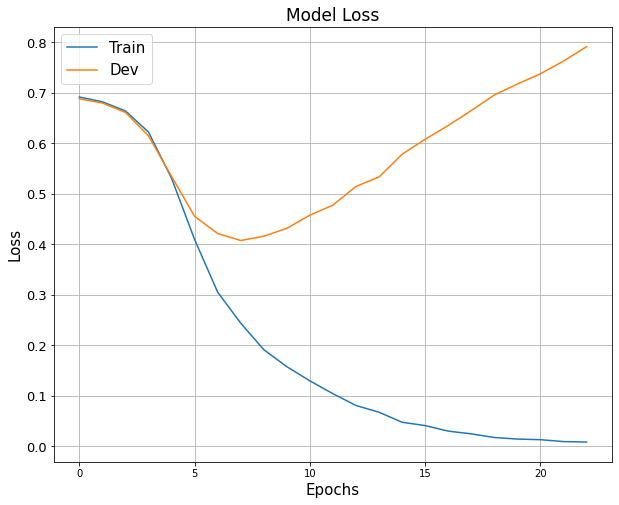

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

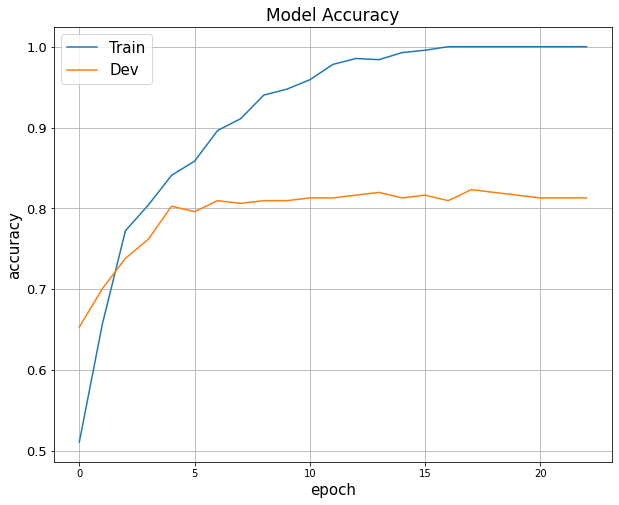

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       481
           1       0.95      0.94      0.94       498

    accuracy                           0.94       979
   macro avg       0.94      0.94      0.94       979
weighted avg       0.94      0.94      0.94       979



In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       295
           1       0.83      0.86      0.84       305

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       224
           1       0.81      0.82      0.82       197

    accuracy                           0.83       421
   macro avg       0.83      0.83      0.83       421
weighted avg       0.83      0.83      0.83       421



Batch Size 16

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=16,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
41/43 [===========================>..] - ETA: 0s - loss: 0.6927 - accuracy: 0.5137
Epoch 1: val_accuracy improved from -inf to 0.55442, saving model to bestweights.hdf5
43/43 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5109 - val_loss: 0.6918 - val_accuracy: 0.5544
Epoch 2/100
43/43 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.6292
Epoch 2: val_accuracy improved from 0.55442 to 0.63605, saving model to bestweights.hdf5
43/43 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.6292 - val_loss: 0.6874 - val_accuracy: 0.6361
Epoch 3/100
30/43 [===================>..........] - ETA: 0s - loss: 0.6814 - accuracy: 0.6354
Epoch 3: val_accuracy improved from 0.63605 to 0.67687, saving model to bestweights.hdf5
43/43 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.6657 - val_loss: 0.6807 - val_accuracy: 0.6769
Epoch 4/100
36/43 [========================>.....] - ETA: 0s - 

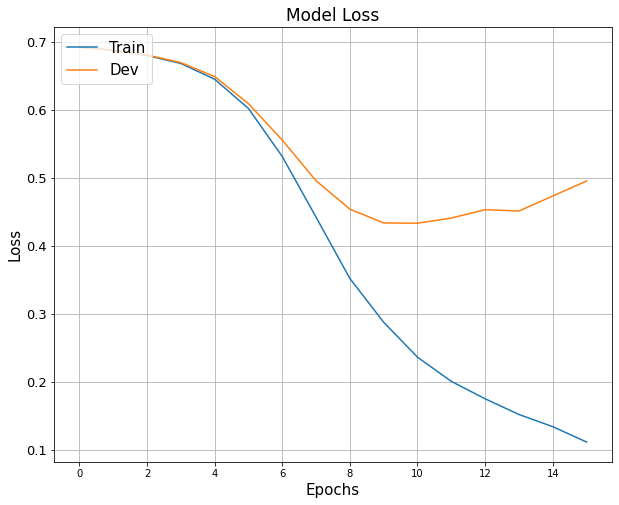

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

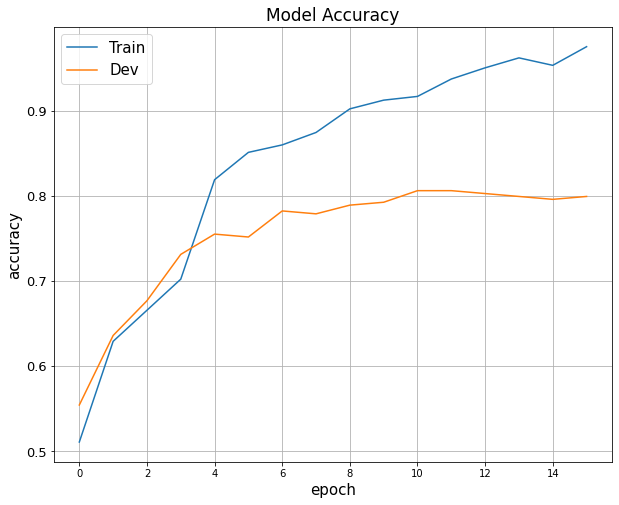

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       481
           1       0.93      0.91      0.92       498

    accuracy                           0.92       979
   macro avg       0.92      0.92      0.92       979
weighted avg       0.92      0.92      0.92       979



In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       295
           1       0.87      0.85      0.86       305

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       224
           1       0.85      0.82      0.84       197

    accuracy                           0.85       421
   macro avg       0.85      0.85      0.85       421
weighted avg       0.85      0.85      0.85       421



## RNN

###Downloading, Importing & Understanding our Data Set

In [ ]:
import locale
#Set encoding for fasttext
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding=getpreferredencoding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4391644 sha256=705e0f83027fdfaf8496bc6dfb078216b409e0480196cce370443ba71986a4c0
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

import numpy as np
from sklearn.datasets import load_files  

#download the files
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
 
#save the reviews and the annotations to x, y respectively 
x, y = movies.data, movies.target

--2023-03-10 15:06:03--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  5.00MB/s    in 0.6s    

2023-03-10 15:06:04 (5.00 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv0

>Finding the Boolean Number for each Category

In [ ]:
#print the target names and the number of reviews
print("(y=0) corresptonds to -->",movies.target_names[0])
print("(y=1) corresptonds to-->",movies.target_names[1])

(y=0) corresptonds to --> neg
(y=1) corresptonds to--> pos


>Printing a Review

In [ ]:
# First sample and target
print('Sample: {} \nTarget: {}'.format(x[0], y[0]))

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 

###  Preprocess Dataset

>Preprocess the Dataset

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# split the sentences to train, test, dev
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.7,random_state=40)
xtrain,xdev,ytrain,ydev=train_test_split(xtrain,ytrain, train_size=0.7,random_state=40)

#show the reviews per data set
print("Number of Reviews in Train Set:",len(xtrain))
print("Number of Reviews in Test Set:",len(xtest))
print("Number of Reviews in Dev Set:",len(xdev))

Number of Reviews in Train Set: 979
Number of Reviews in Test Set: 600
Number of Reviews in Dev Set: 421


In [ ]:
import spacy
import string
import numpy as np
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser","ner"])
from spacy.lang.en.stop_words import STOP_WORDS
nlp.add_pipe('sentencizer') 

#Train set cleaning and tokenization
X_train_tokenized = []
for idx in tqdm(range(len(xtrain))):
  doc = nlp(xtrain[idx])
  tokens = []
  for sent in doc.sents:
    for tok in sent:
      if '\n' in tok.text or "\t" in tok.text or "--" in tok.text or "*" in tok.text or\
       tok.text.lower() in STOP_WORDS or tok.text in string.punctuation:
        continue
      if tok.text.strip():  
        tokens.append(tok.text.replace('"',"'").strip())
  X_train_tokenized.append(tokens)

#Dev set cleaning and tokenization
X_val_tokenized = []
for idx in tqdm(range(len(xdev))):
  doc = nlp(xdev[idx])
  tokens = []
  for sent in doc.sents:
    for tok in sent:
      if '\n' in tok.text or "\t" in tok.text or "--" in tok.text or "*" in tok.text or\
       tok.text.lower() in STOP_WORDS or tok.text in string.punctuation:
        continue
      if tok.text.strip():
        tokens.append(tok.text.replace('"',"'").strip())
  X_val_tokenized.append(tokens)

#Test set cleaning and tokenization
X_test_tokenized = []
for idx in tqdm(range(len(xtest))):
  doc = nlp(xtest[idx])
  tokens = []
  for sent in doc.sents:
    for tok in sent:
      if '\n' in tok.text or "\t" in tok.text or "--" in tok.text or "*" in tok.text or\
       tok.text.lower() in STOP_WORDS or tok.text in string.punctuation:
        continue
      if tok.text.strip():
        tokens.append(tok.text.replace('"',"'").strip())
  X_test_tokenized.append(tokens)

  0%|          | 0/979 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 600/600 [00:26<00:00, 22.94it/s]


###Converting to 1-Hot Vectors

In [ ]:
import tensorflow as tf
#Create a list of the 2 categories
cat=["neg","pos"]

y_train_1_hot = tf.keras.utils.to_categorical(ytrain, num_classes=len(cat))
y_dev_1_hot = tf.keras.utils.to_categorical(ydev, num_classes=len(cat))
y_test_1_hot = tf.keras.utils.to_categorical(ytest, num_classes=len(cat))

for lidx,label in enumerate(cat):
  print("Index: {} Category: {}".format(lidx,label))
print("Label index: {} | 1-hot vector:  {}".format(ytrain[0], y_train_1_hot[0]))
print("Label index: {} | 1-hot vector:  {}".format(ytrain[10],y_train_1_hot[10]))

Index: 0 Category: neg
Index: 1 Category: pos
Label index: 0 | 1-hot vector:  [1. 0.]
Label index: 1 | 1-hot vector:  [0. 1.]


### Custom Keras callback for calculating f1, precision, recall at the end of each epoch

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
import os

#Custom Metrics Functions
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        

        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

### Tokenize, convert text (sequence of words) to sequence of indexes and PAD the sequences


In [ ]:
MAX_WORDS = 100000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 300

# Keras tokenizer uses \s for separating tokens
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_WORDS,oov_token='UNK')
tokenizer.fit_on_texts([" ".join(x) for x in X_train_tokenized])

train_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_train_tokenized])
val_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_val_tokenized])
test_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_test_tokenized])

train_data = tf.keras.utils.pad_sequences(train_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
test_data = tf.keras.utils.pad_sequences(test_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
val_data = tf.keras.utils.pad_sequences(val_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
print(train_data[0])

[ 1620 18270  4844   866    45   513  3193    92 13844  1992  1178  4497
   912  8416  3194 13845  3059  1864  1664   257 18271  1993  1795   705
  1098   942   251 11291   751  2926 18272    64   502  3060  3544     7
  1149 13846 13847  5241  4497 18273  8417  2383  2691   328 11292   742
  3195  1569 18274  1994  2927  3951  8418  7505 13848 18275    70  4202
 11293  1492 18276  3196  2222 11294   385  2695  8419   991    79    33
    59  4845 11295  3952  1438   279 13849  1024  3953    84   550  8420
  4841  4846   265  1099 11296  5245  2383  2691   695   115   380  9598
    14   380   924  7506 11297  6754  4203 13850   189  3195  3954   943
    55  6755  1328  2812    40     4    18  6756 13851 13852  3955  6150
  1995  1926  3366 13853   116     6  2297  2298   279   259  2136  1291
  1621  3956 18277   233   867 18278   601 11298   279  1291  2067  3757
  7507   316 18279  3061   329    36    22   280  5246    24  6757  2299
  2813   719   155     2   234  1025  6151   622  8

In [ ]:
#Print number of tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29707 unique tokens.


### Install Tensorflow

In [ ]:
%%capture
!pip install -U tensorflow

### Download, unzip & load fasttext word embeddings

In [ ]:
#Import word embeddings
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gzip -d cc.en.300.bin.gz

--2023-03-26 18:35:40--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.59, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   168MB/s    in 31s     

2023-03-26 18:36:11 (139 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!pip install -U fasttext

### Initialize embedding matrix with fasttext pre-trained embedings

In [ ]:
import fasttext 

#Load embeddings
fasttext_model = fasttext.load_model('cc.en.300.bin')
embedding_matrix = np.zeros(shape=((MAX_WORDS + 2), 300))

for key, value in word_index.items():  
  if value <= MAX_WORDS:
    embedding_matrix[value] = fasttext_model.get_word_vector(word=key)

del fasttext_model

### Create and train the RNN Model


In [ ]:
class SelfAttention(tf.keras.layers.Layer):
  def __init__(self, mlp_layers, units, return_attention=False, **kwargs):
    super(SelfAttention, self).__init__(**kwargs)
    self.mlp_layers = mlp_layers
    self.mlp_units = units
    self.return_attention = return_attention
    self.attention_mlp = self.build_mlp()
  
  def build_mlp(self):
    mlp = tf.keras.Sequential()
    # mlp.add(tf.keras.layers.Flatten())
    for i in range(self.mlp_layers):
      mlp.add(tf.keras.layers.Dense(self.mlp_units, activation='relu'))
    mlp.add(tf.keras.layers.Dense(1))
    return mlp
  
  def call(self, x, mask=None):
    a = self.attention_mlp(x)
    a = tf.squeeze(a, axis=2)
    print(x.shape)
    print(a.shape)

    if mask is not None:
      mask = tf.keras.backend.cast(mask, tf.keras.backend.floatx())
      a -= 100000.0 * (1.0 - mask)
      # a *= tf.keras.backend.cast(mask, tf.keras.backend.floatx())
    
    a = tf.keras.backend.expand_dims(tf.keras.backend.softmax(a, axis=-1))
    weighted_input = x * a
    result = tf.keras.backend.sum(weighted_input, axis=1)
    print(result.shape)

    if self.return_attention:
      return [result, a]
    return result


### Tunning with Keras-Tuner

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.9 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os

def model_builder(hp):
  # create empty sequential model
  model1 = tf.keras.Sequential()

  #Add embeddings
  model1.add(tf.keras.layers.Embedding(MAX_WORDS+2, EMBEDDING_DIM, 
                                     weights=[embedding_matrix], 
                                     input_length=MAX_SEQUENCE_LENGTH, 
                                     mask_zero=True, trainable=True))
  
  model1.add(tf.keras.layers.Dropout(hp.Choice('first dropout', [0.25, 0.5])))

  for i in range(hp.Int('BiGRU_layers', 1,4,2)):  
    # add a bidirectional gru layer with 0.25 variational (recurrent) dropout 
    model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(hp.Choice('GRU_SIZE_for number of layers -->'+str(i), [100,300,600]),
                                                                 activation='tanh',
                                                                 recurrent_activation='sigmoid',
                                                                 return_sequences=True,
                                                                 recurrent_dropout=0,
                                                                 use_bias=True,
                                                                 unroll=False)))#'relu',"tanh","softmax"   hp.Choice('first after self attention activation function', [])) 

  model1.add(tf.keras.layers.Dropout(hp.Choice('second dropout', [0.25, 0.5])))

  # Add deep self-attention layer
  model1.add(SelfAttention(mlp_layers=hp.Choice('self_attention_layers', [1,2,5]), units=hp.Choice('self attention neurons', [100,300,600])))

  # add a hidden MLP layer
  model1.add(tf.keras.layers.Dense(256, activation=hp.Choice('first after self attention activation function', ['relu',"tanh"]) ))

  # dropout layer
  model1.add(tf.keras.layers.Dropout(hp.Choice('third dropout', [0.2, 0.5])))

  model1.add(tf.keras.layers.Dense(len(cat), activation='softmax'))

  model1.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3,1e-4,0.00001])),
                  metrics=["categorical_accuracy"])
  return model1

<ipython-input-17-192929eda928>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperParameters


In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os

import keras_tuner as kt

tuner = kt.RandomSearch(model_builder,
                        objective='val_categorical_accuracy',
                        max_trials=20,
                        directory='my_dir',
                        project_name='intro_to_kt',seed = 40, overwrite = True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

(None, 256, 200)
(None, 256)
(None, 200)


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [ ]:
tuner.search(train_data, y_train_1_hot, epochs=50,callbacks=[early_stopping],validation_data=(val_data,y_dev_1_hot))
best_hps=tuner.get_best_hyperparameters(num_trials=20)[0]
tuner.results_summary(1)

Trial 20 Complete [00h 01m 46s]
val_categorical_accuracy: 0.8574821949005127

Best val_categorical_accuracy So Far: 0.8574821949005127
Total elapsed time: 00h 49m 37s
Results summary
Results in my_dir/intro_to_kt
Showing 1 best trials
Trial summary
Hyperparameters:
first dropout: 0.5
BiGRU_layers: 1
GRU_SIZE_for number of layers -->0: 600
second dropout: 0.5
self_attention_layers: 1
self attention neurons: 600
first after self attention activation function: relu
third dropout: 0.5
learning_rate: 0.001
GRU_SIZE_for number of layers -->1: 300
GRU_SIZE_for number of layers -->2: 300
Score: 0.8574821949005127


### Training for the Optimal Model

In [ ]:
model = tuner.hypermodel.build(best_hps)

history8 = model.fit(train_data, y_train_1_hot,
              validation_data=(val_data, y_dev_1_hot),
              batch_size=124,
              shuffle=True,
              epochs=100,
              callbacks=[early_stopping, Metrics(valid_data=(val_data, y_dev_1_hot))])

eval_result = model.evaluate(test_data,y_test_1_hot)
print("[test loss, test accuracy]:", eval_result)

(None, 256, 1200)
(None, 256)
(None, 1200)
Epoch 1/100
(None, 256, 1200)
(None, 256)
(None, 1200)
(None, 256, 1200)
(None, 256)
(None, 1200)
8/8 [==============================] - ETA: 0s - loss: 0.6845 - categorical_accuracy: 0.5669(None, 256, 1200)
(None, 256)
(None, 1200)
(None, 256, 1200)
(None, 256)
(None, 1200)
14/14 [==============================] - 3s 42ms/step
 — val_f1: 0.485141 — val_precision: 0.717001 — val_recall: 0.584323
8/8 [==============================] - 20s 1s/step - loss: 0.6845 - categorical_accuracy: 0.5669 - val_loss: 0.6593 - val_categorical_accuracy: 0.5843 - val_f1: 0.4851 - val_recall: 0.5843 - val_precision: 0.7170
Epoch 2/100
14/14 [==============================] - 1s 40ms/step
 — val_f1: 0.693360 — val_precision: 0.767898 — val_recall: 0.714964
8/8 [==============================] - 4s 544ms/step - loss: 0.6083 - categorical_accuracy: 0.6885 - val_loss: 0.5768 - val_categorical_accuracy: 0.7150 - val_f1: 0.6934 - val_recall: 0.7150 - val_precision: 0.

### Results

>Accuracy

In [ ]:
eval_result = model.evaluate(test_data,y_test_1_hot)
print("[test loss, test accuracy]:", eval_result)

19/19 [==============================] - 1s 46ms/step - loss: 0.8012 - categorical_accuracy: 0.8450
[test loss, test accuracy]: [0.8012354373931885, 0.8450000286102295]


>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

predictions = np.argmax(model.predict(train_data), -1)
print(classification_report(ytrain, predictions, target_names=cat))

31/31 [==============================] - 2s 48ms/step
              precision    recall  f1-score   support

         neg       1.00      1.00      1.00       481
         pos       1.00      1.00      1.00       498

    accuracy                           1.00       979
   macro avg       1.00      1.00      1.00       979
weighted avg       1.00      1.00      1.00       979



>Classification Report for Test Set

In [ ]:
predictions = np.argmax(model.predict(test_data), -1)
print(classification_report(ytest, predictions, target_names=cat))

19/19 [==============================] - 1s 46ms/step
              precision    recall  f1-score   support

         neg       0.82      0.87      0.85       295
         pos       0.87      0.82      0.84       305

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



>Classification Report for Dev Set

In [ ]:
predictions = np.argmax(model.predict(val_data), -1)
print(classification_report(ydev, predictions, target_names=cat))

14/14 [==============================] - 1s 45ms/step
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87       224
         pos       0.87      0.82      0.84       197

    accuracy                           0.86       421
   macro avg       0.86      0.86      0.86       421
weighted avg       0.86      0.86      0.86       421



>Precision Recall AUC Score for Train Set

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve


probs_belong_to_class = model.predict(train_data)
probs_belong_to_class_0=probs_belong_to_class[:,0]
probs_belong_to_class_1=1-probs_belong_to_class[:,0]
probs_belong_to_class_0 = probs_belong_to_class_0.reshape(len(train_data),1)
probs_belong_to_class_1 = probs_belong_to_class_1.reshape(len(train_data),1)


predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

31/31 [==============================] - 1s 44ms/step

Precision Recall AUC score for the negative class:
0.999987100283543

Precision Recall AUC score for the positive class:
0.9999878912187004

Macro-averaged Precision Recall AUC score:
0.9999874957511217


>Precision Recall AUC Score for Test Set

In [ ]:
probs_belong_to_class = model.predict(test_data)

probs_belong_to_class_0=probs_belong_to_class[:,0]
probs_belong_to_class_1=1-probs_belong_to_class[:,0]
probs_belong_to_class_0 = probs_belong_to_class_0.reshape(len(test_data),1)
probs_belong_to_class_1 = probs_belong_to_class_1.reshape(len(test_data),1)


predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,0],pos_label=0)
area_test_1 = auc(recall, precision)
print(area_test_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,1],pos_label=1)
area_test_2 = auc(recall, precision)
print(area_test_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_test_1+area_test_2)/2)

19/19 [==============================] - 1s 46ms/step

Precision Recall AUC score for the negative class:
0.9038531414470768

Precision Recall AUC score for the positive class:
0.9182257872261121

Macro-averaged Precision Recall AUC score:
0.9110394643365944


>Precision Recall AUC Score for Dev Set

In [ ]:
probs_belong_to_class = model.predict(val_data)

probs_belong_to_class_0=probs_belong_to_class[:,0]
probs_belong_to_class_1=1-probs_belong_to_class[:,0]
probs_belong_to_class_0 = probs_belong_to_class_0.reshape(len(val_data),1)
probs_belong_to_class_1 = probs_belong_to_class_1.reshape(len(val_data),1)


predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,0],pos_label=0)
area_dev_1 = auc(recall, precision)
print(area_dev_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,1],pos_label=1)
area_dev_2 = auc(recall, precision)
print(area_dev_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_dev_1+area_dev_2)/2)

14/14 [==============================] - 1s 46ms/step

Precision Recall AUC score for the negative class:
0.9315050294544006

Precision Recall AUC score for the positive class:
0.910342264774071

Macro-averaged Precision Recall AUC score:
0.9209236471142358


###Learning Curves

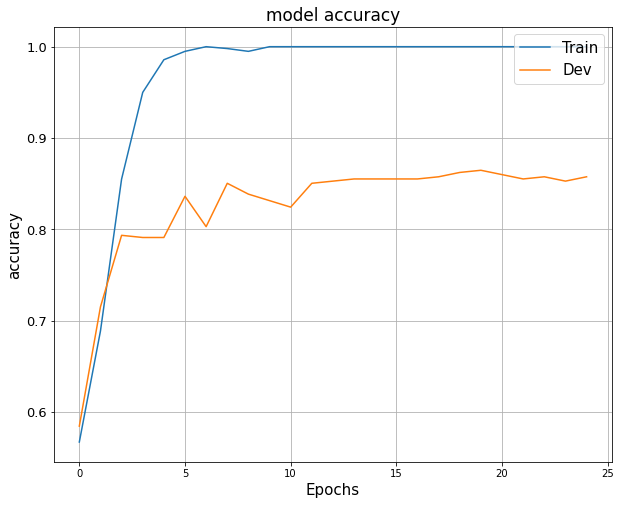

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history8.history['categorical_accuracy'])
plt.plot(history8.history['val_categorical_accuracy'])
plt.title('model accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper right', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

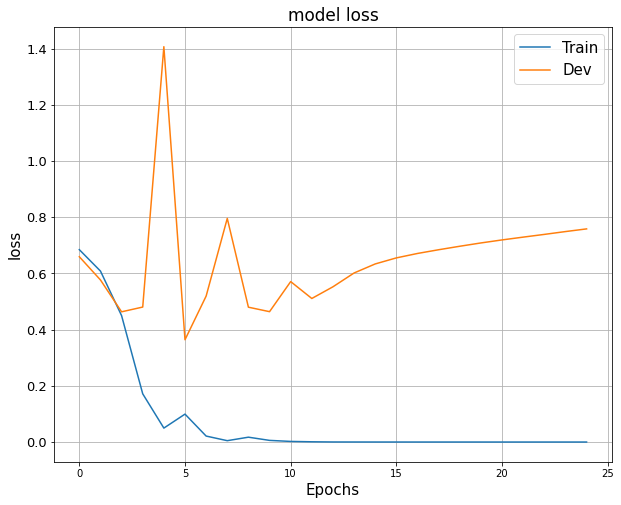

In [ ]:

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss', fontsize=17)
plt.ylabel('loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper right', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

### Extras (Trainable=False)

In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os

def model_builder(hp):
  # create empty sequential model
  model1 = tf.keras.Sequential()

  #Add embeddings
  model1.add(tf.keras.layers.Embedding(MAX_WORDS+2, EMBEDDING_DIM, 
                                     weights=[embedding_matrix], 
                                     input_length=MAX_SEQUENCE_LENGTH, 
                                     mask_zero=True, trainable=False))
  
  model1.add(tf.keras.layers.Dropout(hp.Choice('first dropout', [0.25, 0.5])))

  for i in range(hp.Int('BiGRU_layers', 1,4,2)):  
    # add a bidirectional gru layer with 0.25 variational (recurrent) dropout 
    model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(hp.Choice('GRU_SIZE_for number of layers -->'+str(i), [100,300,600]),
                                                                 activation='tanh',
                                                                 recurrent_activation='sigmoid',
                                                                 return_sequences=True,
                                                                 recurrent_dropout=0,
                                                                 use_bias=True,
                                                                 unroll=False)))#'relu',"tanh","softmax"   hp.Choice('first after self attention activation function', [])) 

  model1.add(tf.keras.layers.Dropout(hp.Choice('second dropout', [0.25, 0.5])))

  # Add deep self-attention layer
  model1.add(SelfAttention(mlp_layers=hp.Choice('self_attention_layers', [1,2,5]), units=hp.Choice('self attention neurons', [100,300,600])))

  # add a hidden MLP layer
  model1.add(tf.keras.layers.Dense(256, activation=hp.Choice('first after self attention activation function', ['relu',"tanh"]) ))

  # dropout layer
  model1.add(tf.keras.layers.Dropout(hp.Choice('third dropout', [0.2, 0.5])))

  model1.add(tf.keras.layers.Dense(len(cat), activation='softmax'))

  model1.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3,1e-4,0.00001])),
                  metrics=["categorical_accuracy"])
  return model1

In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os

import keras_tuner as kt

tuner = kt.RandomSearch(model_builder,
                        objective='val_categorical_accuracy',
                        max_trials=20,
                        directory='my_dir',
                        project_name='intro_to_kt',seed = 40, overwrite = True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

(None, 256, 200)
(None, 256)
(None, 200)


In [ ]:
from kerastuner import HyperParameters

# Define the hyperparameters to tune
hp = HyperParameters()

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [ ]:
tuner.search(train_data, y_train_1_hot, epochs=50,callbacks=[early_stopping],validation_data=(val_data,y_dev_1_hot))
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.results_summary(1)

Trial 20 Complete [00h 01m 46s]
val_categorical_accuracy: 0.8503562808036804

Best val_categorical_accuracy So Far: 0.8669833540916443
Total elapsed time: 00h 41m 36s
Results summary
Results in my_dir/intro_to_kt
Showing 1 best trials
Trial summary
Hyperparameters:
first dropout: 0.5
BiGRU_layers: 1
GRU_SIZE_for number of layers -->0: 100
second dropout: 0.25
self_attention_layers: 5
self attention neurons: 300
first after self attention activation function: relu
third dropout: 0.2
learning_rate: 0.001
Score: 0.8669833540916443


In [ ]:
model = tuner.hypermodel.build(best_hps)

history8 = model.fit(train_data, y_train_1_hot,
              validation_data=(val_data, y_dev_1_hot),
              batch_size=124,
              shuffle=True,
              epochs=100,
              callbacks=[early_stopping, Metrics(valid_data=(val_data, y_dev_1_hot))])

eval_result = model.evaluate(test_data,y_test_1_hot)
print("[test loss, test accuracy]:", eval_result)

(None, 256, 200)
(None, 256)
(None, 200)
Epoch 1/100
(None, 256, 200)
(None, 256)
(None, 200)
(None, 256, 200)
(None, 256)
(None, 200)
8/8 [==============================] - ETA: 0s - loss: 0.6866 - categorical_accuracy: 0.5526(None, 256, 200)
(None, 256)
(None, 200)
(None, 256, 200)
(None, 256)
(None, 200)
14/14 [==============================] - 3s 23ms/step
 — val_f1: 0.404487 — val_precision: 0.696732 — val_recall: 0.546318
8/8 [==============================] - 19s 876ms/step - loss: 0.6866 - categorical_accuracy: 0.5526 - val_loss: 0.6775 - val_categorical_accuracy: 0.5463 - val_f1: 0.4045 - val_recall: 0.5463 - val_precision: 0.6967
Epoch 2/100
14/14 [==============================] - 0s 16ms/step
 — val_f1: 0.667511 — val_precision: 0.726527 — val_recall: 0.688836
8/8 [==============================] - 1s 140ms/step - loss: 0.6703 - categorical_accuracy: 0.6047 - val_loss: 0.6473 - val_categorical_accuracy: 0.6888 - val_f1: 0.6675 - val_recall: 0.6888 - val_precision: 0.7265
Ep